# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**No-show appointments dataset is a collection of 100,000 medical appointments of patients in Brazil. It seeks to assist in finding reasons why people with appointments with doctors fail to show up for their appointments. There is ample information that will tell a story of why people do not show up and assist in mitigating this challenge. This will help answer questions in the analysis section and  overcome problems like inadequate management of patients ailments.**

The columns in the dataset are: 

- Patient ID - This is a unique identification for individual patients and it helps identify one patient from another.


- Appointment ID - This is a unique identification for individual appointments an it is important to identify an appointment.


- Gender- This column comprises of the genders of the patients who are either male of female. 


- Scheduled day - This is the day a patient scheduled the appointmnet to see the doctor and it helps know the reason they miss appointments.


- Appointment day - This is the day a patient visits the doctor. It helps us know if the patient actually shows up.


- Age - This is how old the patient is. It helps us identify hich ages attend their appointments.


- Neighbourhood - This is the location of the health facility. It helps in determining which hospitals are most visited by patients.


- Scholarship - This shows if the patient is enrolled in the Bolsa Familia welfare program. This will help know if the program members are attending their appointments.


- Diabetes - This shows if the patient has Diabetes or not. This will help know if patients with Diabetes attend their appointments. 



- Hipertension - This shows if the patient has Hipertension or not. This will help know if patients with Hipertension attend their appointments.


- Alcoholism - This shows if the patient is an alcoholic. This will help know if patients with Alcoholism attend their appointments.


- Handcap - This shows if the patient has a Handicap. This will help know if patients with Handicap attend their appointments. 


- SMS received -This shows if the patient has recieved an SMS from the hospital. This will help know if patients receive a SMS from the hospital attend their appointments. 


- No show - This shows if the patient has attended their appointmnet or not. This will help know if patients actually attend their appointments.


### Question(s) for Analysis
The following are some of the questions that we seek to answer from the analysis of this dataset:

1. How is the attendance to the appointments by the patients?


2. What is the relationship between the independent variables and the dependent variable?


3. What is the attendance of the patients on the Scholarship program to their medical appointments?


In [1]:
#Import statements for all of the packages that are used.

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



In this section the data is loaded into the notebook and we shall examine it and determine what mistakes there are and handle them in the Data Cleaning section.


### General Properties


In [2]:
# Loading the data and print out a few lines. Performing operations to inspect data
df_noshow = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#checking for information on the dataset i.e datatypes,number of rows and columns
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Looking for instances of missing data.
df_noshow.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
# Looking for instances of duplicated data
df_noshow.duplicated().sum()

0

In [6]:
df_noshow.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
#Looking at the datatypes of the column values
df_noshow.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Data Cleaning

During the wrangling process there are few problems noticed with the dataset and they include:

1. The column names Hipertension and Handicap and are misspelled while SMS_recieved doesnt require the underscore also No-show does not need the - sign.

2. The Patient ID and Appointment ID columns are not relevant to this analysis.

3. The datatypes of Scheduled day and Appointment day are incorrect. They are objects which is incoreect because they are dates which should be date datatypes.
 
 
In this Data Cleaning section we shall make corrections to aforementioned problems. 

In [8]:
# Renaming Hipertension column to Hypertension
df_noshow.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)

#Confirming changes
df_noshow.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [9]:
#Renaming the Handcap column to Handicap
df_noshow.rename(columns={'Handcap':'Handicap'}, inplace=True)

#Confirming changes
df_noshow.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
#Renaming the SMS_recieved column to SMS recieved
df_noshow.rename(columns={'SMS_received':'SMS received'}, inplace=True)

#Confirming changes
df_noshow.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [13]:
# #Converting Scheduled day from object to datetime datatype
# df_noshow['ScheduledDay'] = pd.to_datetime(df_noshow['ScheduledDay'])
# # Confirming changes
# df_noshow.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay                 object
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS received                    int64
NoShow                         object
dtype: object

In [14]:
#Converting Appointment day from object to datetime datatype
df_noshow['AppointmentDay'] = pd.to_datetime(df_noshow['AppointmentDay'])
#Confirming changes
df_noshow.dtypes

Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS received                    int64
NoShow                         object
dtype: object

In [11]:
#Renaming the SMS_recieved column to SMS recieved
df_noshow.rename(columns={'No-show':'NoShow'}, inplace=True)

#Confirming changes
df_noshow.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [43]:
#Dropping columns we do not need for this analysis
df_noshow.drop(['ScheduledDay','AppointmentDay','Neighbourhood'],axis=1, inplace=True)

#Confirming changes
df_noshow.head(1)

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS received,NoShow
0,F,62,0,1,0,0,0,0,No


In [44]:
df_noshow.head()

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS received,NoShow
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


The data is clean and ready for exploration. Here statistics shall be used to address the questions in the Indroduction part and visualizations will also be created to answer the questions.


### 1. How is the attendance to the appointments by the patients?

In [45]:
#Grouping the data by attendance counting each entry whether they attended (Yes) or not (No)
Attendance = df_noshow.groupby(['NoShow'])['NoShow'].count().to_frame()

Attendance

,NoShow
NoShow,
No,88208
Yes,22319


In [16]:
#Importing a color map for the pie chart to represent the data
cmap = plt.get_cmap("tab20c")
color = cmap(np.array([1,2,5,6,9,10]))

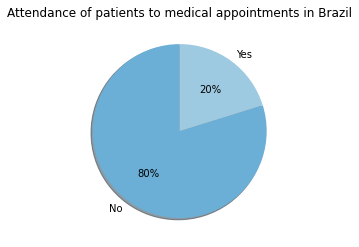

In [17]:
# To plot a pie chart
plt.pie(Attendance.NoShow,colors=color,
       labels = Attendance.index,startangle=90,autopct="%1.0f%%",
       explode = None,shadow= True)

plt.title("Attendance of patients to medical appointments in Brazil")
plt.show()

**The data shows that only 20% of patients attended their medical appointments while 80% failed to attend their appointments.**

### 2. What is the relatonship between the independent variables and the dependent variable?

In [18]:
#
def create_groups(
    df:pd.DataFrame, var1: str,
    var2: str)->pd.DataFrame:
    
    category =df.groupby([var1,var2])[var2].count().to_frame()
    
    print('NoShow' + 'by' +var1)
    
    return category

In [19]:
create_groups(df_noshow, 'Scholarship','NoShow')

NoShowbyScholarship


NoShow
Scholarship NoShow        
0           No       79925
            Yes      19741
1           No        8283
            Yes       2578

In [ ]:
create_groups(df_noshow, 'Age','NoShow')

In [22]:
create_groups(df_noshow,'Gender','NoShow')

NoShowbyGender


NoShow
Gender NoShow        
F      No       57246
       Yes      14594
M      No       30962
       Yes       7725

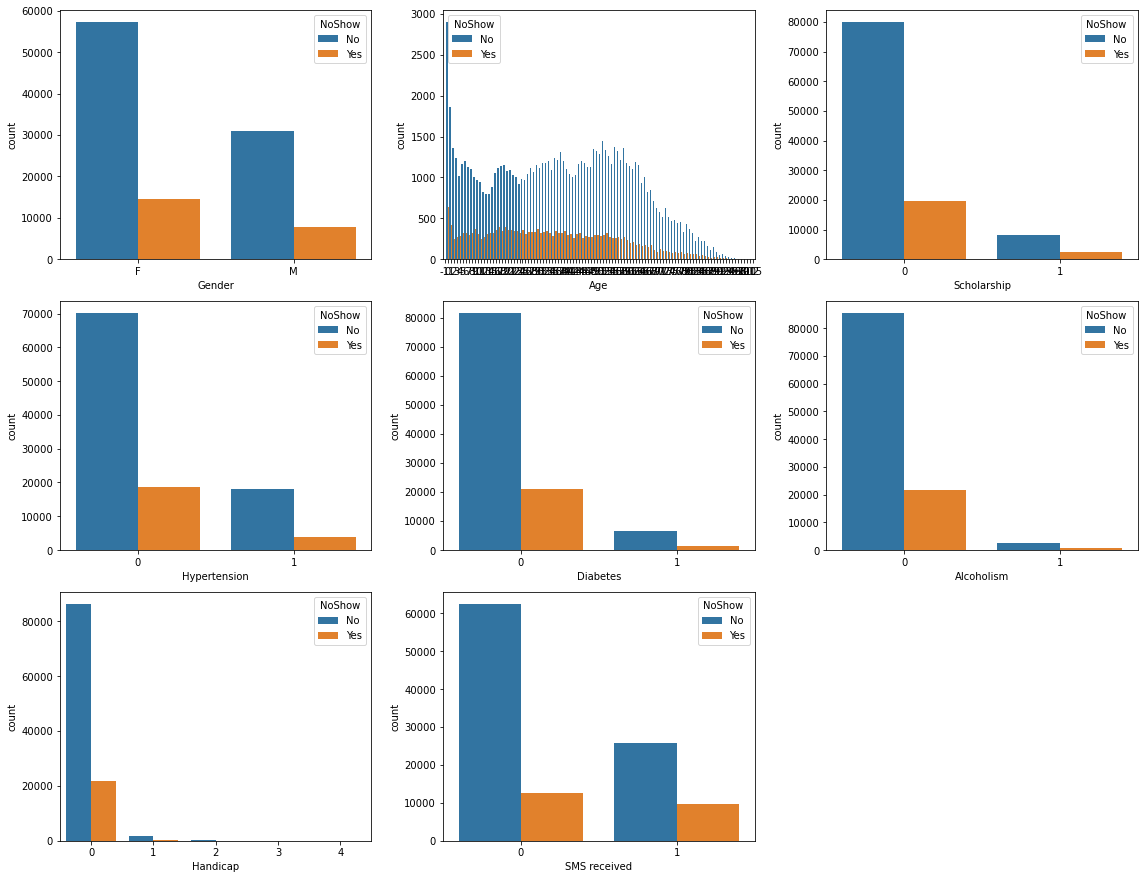

In [46]:
# Plotting all independent variables against the dependent variable which is No Show
i=1
plt.figure(figsize=(16,24))
for feature in [col for col in df_noshow.columns if col!='NoShow']:
    plt.subplot(6,3,i),
    a= sns.countplot(x= feature, hue='NoShow',data= df_noshow)
    plt.tight_layout()
    i +=1

The important details from the visualizations are as follows:

**Gender** - there is a stark difference between males and females in terms of attendance to their medical appointments. The visualization show fewer males are attending their appointments compared to the females.

**SMS received** - there is a large difference in the people who do receive SMS reminders for the appointments. A large number of those who receive the text do not show up to their appointments.

**Diabetes** - there is a dismal trend in the patients who have Diabetes. The visualiation shows they attend their appointments the least compared to those without the disease.

**Hypertension** - there is a dismal trend in the patients who have Hypertension. The visualiation shows they attend their appointments the least compared to those without the disease.

### 3. What is the attendance of people who are in the Scholarship program?

In [36]:
Members = df_noshow.groupby(['Scholarship'])['NoShow'].count().to_frame()

Members

,NoShow
Scholarship,
0,99666
1,10861


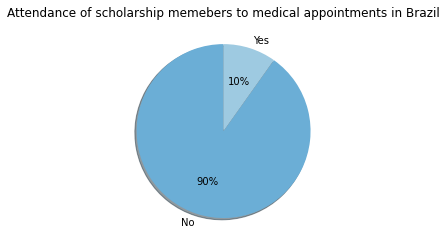

In [40]:
#Plotting the Scholarship members attendance
plt.pie(Members.NoShow,colors=color,
       labels = Attendance.index,startangle=90,autopct="%1.0f%%",
       explode = None,shadow= True)

plt.title("Attendance of scholarship memebers to medical appointments in Brazil")
plt.show()

**The data shows that only 10% of members who are on the Scholarship program attended their medical appointments while 90% of patients who are on the Scholarship program attended their medical appointments**

<a id='conclusions'></a>
## Conclusions

In this section a detailed summary of the research is provide in relation to the questions posed in the Introduction section.

From the study of 100,000 medical appointments by patients in Brazil we can draw the general conclusion that most of them do not attend their scheduled appointments. This is a sad state of affairs as medical appointmanets are very useful in early detection of diseases and also management of patients' conditions. 

1. How is the attendance to the appointments by the patients?
The attendance of patients to their medical appointments is poor as only 20% of them attend their appointments that they schedule. 80% of patients fail to attend their appointmnets and this poses a challenge of management of their conditions such as Diabetes and Hypertension. This may have a domino effect of symptoms getting worse and even early deaths when this could be prevented by the patients attending their appointments.


2. What is the relationships between the independent variables and the dependent variable?
In terms of **Gender**, there is a difference between males and females in terms of attendance to their medical appointments with fewer males are attending their appointments compared to the females.

- In terms of **SMS received**, there is a large difference in the people who do receive SMS reminders for the appointments with a greater number of those who receive the text not showing up to their appointments.

- In terms of **Diabetes**, there is a dismal trend in the patients who have Diabetes, they attend their appointments the least compared to those without the disease.

- In terms of **Hypertension**, there is a dismal trend in the patients who have Hypertension, they attend their appointments the least compared to those without the disease.

3. What is the attendance of the patients on the Scholarship program to their medical appointments?
The attendence of patients on the Scholarship program is poor with only 10% of them attending their scheduled appointments while an astounding 90% do not. This was a special feature to study because the Scholarship program dubbed *Bolsa Familia* is a welfare program intended to assist families in Brazil by providing them with an allowance, this move as made to assist them in part with their medical expenses. However, as the study shows this is not the case. This situation needs to be looked into by the government and mesuares put in place to ensure the program works for the people of Brazil and also they should be encouraged to attend their medical appointments.

*Limitations in the research*

There may be more factors around the reasons Brazilian citizens fail to show up to their medical appointments that may not have been factored in to this research and may affect the results of the study.

*Additional research*

Additional research needs to be done on the Scholarship program to find out why the program intention was not met and why citizens on the Scholarship program are not responding to medical attention in terms of attending their scheduled appointments.



**REFERENCES**

Pereira, A. W. (2015). Bolsa Família and democracy in Brazil. Third World Quarterly, 36(9), 1682-1699.



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])